# Problem 1: Regression Problem

Datasettet er ikke i riktig format, den burde være komma separert mens nåværende er semikolon separert som gjør at importering i Python ved bruk av visse metoder kan føre til feil/bugs. Første steget blir å gjøre om semikolon til komma.

In [ ]:
file1 = open("Regression_housedata.csv","r")
file2 = open(r"Regression_housedata_updated.csv","w")

data = file1.read()

x = data.replace(";", ",") # Erstatter alle semikolon med komma.

file2.writelines(x)
file1.close() # For å endre "File Access Mode" må man huske stenge filen før vi fortsetter.
file2.close() # For å endre "File Access Mode" må man huske stenge filen før vi fortsetter.


In [ ]:
# Åpner datasettet for å vise en liten oversikt over øverste delen av datasettet.
import pandas as pd
df = pd.read_csv('Regression_housedata_updated.csv')
df.head()

,id,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,7129300520,3,1180,5650,1,1180,0,221900.0
1,6414100192,3,2570,7242,2,2170,400,538000.0
2,5631500400,2,770,10000,1,770,0,180000.0
3,2487200875,4,1960,5000,1,1050,910,604000.0
4,1954400510,3,1680,8080,1,1680,0,510000.0


In [ ]:
# Separerer de andre attributtene fra prediksjon attributte.
x = df.drop('price',axis=1)

# Sparerer prediksjon attributte inn i "Y" for "Model Training"
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

# Her splittes dataen.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Multilinear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Lager objekt av "LinearRegression Class"
LR = LinearRegression()

# Fitting Trainnig Data...
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Evaluerer nøyaktigheten.
score=r2_score(y_test,y_prediction)
print('Coefficient of Determination is (R2): ',score)
print('mean_sqrd_error is: ',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Coefficient of Determination is (R2):  0.47025591897108
mean_sqrd_error is:  47625964064.695595
root_mean_squared error of is:  218233.7372284487


####  kNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
y_prediction =  neigh.predict(x_test)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Evaluerer nøyaktigheten.
score=r2_score(y_test,y_prediction)
print('Coefficient of Determination is (R2): ',np.abs(score))
print('mean_sqrd_error is: ',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Coefficient of Determination is (R2):  0.4308116759938603
mean_sqrd_error is:  128635293728.76625
root_mean_squared error of is:  358657.6274509804


#### Konklusjon:

Multilinear Regressor gir best resultat på datasettet siden den har høyere "Coefficient of Determination (R2)" og lavere "Mean Square Error" enn kNN Regressor

# Problem 2: Clustering Problem

In [ ]:
import pandas as pd
df = pd.read_csv('Clustering_diabetesdata.csv')
df.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
import matplotlib.pyplot as plt

#### k-Means clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(df)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
# Den laveste SSE verdien.
kmeans.inertia_

2932905.8813211545

In [ ]:
# Endelige lokasjoner til "Centroid"
kmeans.cluster_centers_

array([[  4.02702703, 114.30561331,  67.97713098,  14.77962578,
         12.34927235,  30.82598753,   0.43139709,  33.95218295],
       [  3.80851064, 159.        ,  72.12765957,  32.        ,
        411.29787234,  35.32340426,   0.55004255,  34.42553191],
       [  3.4875    , 126.6375    ,  70.775     ,  29.82916667,
        150.0625    ,  33.67833333,   0.53769583,  31.58333333]])

In [ ]:
# Antall itterasjoner som trengs for "Converge"
kmeans.n_iter_

12

In [ ]:
kmeans.labels_[:5]

array([0, 0, 0, 2, 2])

In [ ]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}

# En liste som holder SSE verdiene for hver K.
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

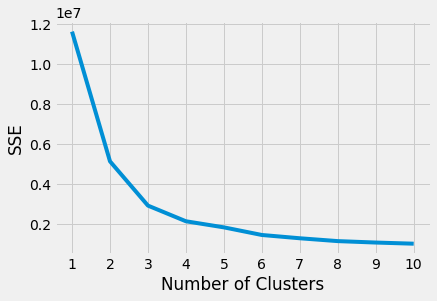

In [ ]:
# Gjør klar for "Elbow" visualisering.
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### Konklusjon 1.

Mengden clustere som er vist med denne "Elbow" metoden viser 3 clustere, siden kurven bøyer seg mest på 3.

#### Hierarichal Clustering

In [ ]:
# Normaliserer dataen slik at skaleringen er lik fordelt på dataen.
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


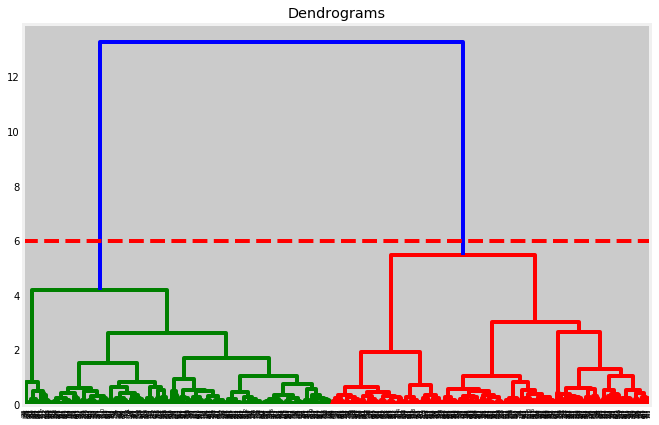

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

Den vertikale linjen som går lengst er den blå linjen, derfor kan vi sette en terskel på 6 og kutte dendogramet. Det er 2 clusters siden den kutter dendogramet på to punkter.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred = cluster.fit_predict(data_scaled)

#### Konklusjon 2.

Hierarchical Clustering gir 2 cluster hvor k-means identifiseres 3 clusters.

# Problem 3: Deep Learning Problem Using Keras 


#### Task 1: Pre-processing of dataset

In [ ]:
import pandas as pd
df_train = pd.read_csv('Deep_Learning_task_train_dataset.csv')
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
obj_df = df_train.select_dtypes(include=['object']).copy()
obj_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
obj_df[obj_df.isnull().any(axis=1)]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
8,FDH17,Regular,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
9,FDU28,Regular,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
25,NCD06,Low Fat,Household,OUT017,NaN,Tier 2,Supermarket Type1
28,FDE51,Regular,Dairy,OUT010,NaN,Tier 3,Grocery Store
...,...,...,...,...,...,...,...
4980,FDJ21,Regular,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4982,FDK56,Low Fat,Fruits and Vegetables,OUT045,NaN,Tier 2,Supermarket Type1
4987,FDR48,Low Fat,Baking Goods,OUT010,NaN,Tier 3,Grocery Store
4990,FDE46,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [ ]:
df_train['Outlet_Size'].value_counts()

Medium    1605
Small     1398
High       558
Name: Outlet_Size, dtype: int64

In [ ]:
# Erstatter NAN verdier med de verdier som gjentar seg oftest.
df_train = df_train.fillna({"Outlet_Size": "Medium"}) # replacing the NAN values with the most common ones

In [ ]:
df_train['Item_Weight'].mean()

12.959605451936872

In [ ]:
# Erstatter NAN verdiene med middelverdier.
df_train = df_train.fillna({"Item_Weight": df_train['Item_Weight'].mean()}) 

In [ ]:
df_train[df_train.isnull().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
# Importerer test data for preprossesering.
import pandas as pd
df_test = pd.read_csv('Deep_Learning_task_test_dataset.csv')
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Erstatter NAN verdier med de verdier som gjentar seg oftest.
df_test = df_test.fillna({"Outlet_Size": "Medium"}) 

# Erstatter NAN verdier med middelverdier.
df_test = df_test.fillna({"Item_Weight": df_train['Item_Weight'].mean()}) 
df_test[df_test.isnull().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCF31,9.130000,Low Fat,0.051928,Household,151.4024,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
1,FDD59,10.500000,Regular,0.000000,Starchy Foods,78.2960,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
2,FDQ52,17.000000,Low Fat,0.119571,Frozen Foods,249.7434,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
3,FDP09,12.959605,Low Fat,0.033726,Snack Foods,211.6902,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
4,FDK24,9.195000,Low Fat,0.101276,Baking Goods,46.4744,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3518,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
3519,FDS36,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN
3520,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
3521,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
for i in df_train.select_dtypes(include=['object']).columns:
    if i not in ['Item_Identifier', 'Outlet_Identifier']:
        df_train[ i + "code"] = ord_enc.fit_transform(df_train[[i]])
        df_test[ i + "code"] = ord_enc.transform(df_test[[i]])
        df_train.drop([i], axis=1, inplace = True)
        df_test.drop([i], axis=1, inplace = True)


In [ ]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Contentcode,Item_Typecode,Outlet_Sizecode,Outlet_Location_Typecode,Outlet_Typecode
0,NCF31,9.130000,0.051928,151.4024,OUT049,1999,NaN,1.0,9.0,1.0,0.0,1.0
1,FDD59,10.500000,0.000000,78.2960,OUT046,1997,NaN,2.0,15.0,2.0,0.0,1.0
2,FDQ52,17.000000,0.119571,249.7434,OUT049,1999,NaN,1.0,5.0,1.0,0.0,1.0
3,FDP09,12.959605,0.033726,211.6902,OUT027,1985,NaN,1.0,13.0,1.0,2.0,3.0
4,FDK24,9.195000,0.101276,46.4744,OUT035,2004,NaN,1.0,0.0,2.0,1.0,1.0


In [ ]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Contentcode,Item_Typecode,Outlet_Sizecode,Outlet_Location_Typecode,Outlet_Typecode
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,1.0,4.0,1.0,0.0,1.0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,2.0,14.0,1.0,2.0,2.0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,1.0,10.0,1.0,0.0,1.0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,2.0,6.0,1.0,2.0,0.0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,1.0,9.0,0.0,2.0,1.0


In [ ]:
df_train.describe().transpose()[['mean', 'std']]

,mean,std
Item_Weight,12.959605,4.263274
Item_Visibility,0.065671,0.051206
Item_MRP,141.344520,62.401514
Outlet_Establishment_Year,1997.900800,8.290423
Item_Outlet_Sales,2188.381667,1703.131187
Item_Fat_Contentcode,1.364800,0.641407
Item_Typecode,7.213000,4.210413
Outlet_Sizecode,1.168000,0.602535
Outlet_Location_Typecode,1.114000,0.808167
Outlet_Typecode,1.198800,0.786004


#### Task 2: Define the architecture of your Deep Learning Model

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [ ]:
X = df_train.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis = 1)
y = df_train['Item_Outlet_Sales']

In [ ]:
X.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Fat_Contentcode         float64
Item_Typecode                float64
Outlet_Sizecode              float64
Outlet_Location_Typecode     float64
Outlet_Typecode              float64
dtype: object

In [ ]:
import os
os.environ['KERAS_BACKEND']='tensorflow'

##### Arkitektur konklusjon:

Arkitekturen av modellen er delt opp i 5 layers, der hvert lag har [1024, 512, 256, 64, 1] neurons. Det siste layer har "Relu" aktivering siden output verdien er forventet og være "non-negative rational number" 

Regularizers er implementert i hver layer for å forhindre overfitting.

In [ ]:
class arguments(object):        
    def __init__(self):
        self.batch_size = 100
        self.num_epochs = 15000 # Beste modellen vil lagres før den når denne verdien.
        # 3000 0.6 r2 score 1time 24min
        # 9000 0.77 r2 score 4time 11min
        # 15 000 0.78 r2 score 6time 8min
        self.learning_rate = 0.00001
args = arguments()

# Hele modellen.
model = Sequential()
model.add(Dense(1024, input_dim=np.array(X).shape[1],kernel_initializer="uniform", activation='selu'))
model.add(Dense(512 , activation='selu', kernel_initializer="uniform",kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(256, activation='selu', kernel_initializer="uniform",kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(64, activation='selu', kernel_initializer="uniform",kernel_regularizer=regularizers.l1(0.001)))

model.add(Dense(1, activation='relu'))

# Kompilerer modellen.
model.compile(optimizer='adam',loss='mean_absolute_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              10240     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 682,881
Trainable params: 682,881
Non-trainable params: 0
_________________________________________________________________


#### Task 3: Model Training

In [ ]:
%%time
history = model.fit(
    X,
    y,
    epochs=args.num_epochs,
    batch_size = args.batch_size,
    # Suppress logging.
    verbose=2,
    # Kalkulerer validering resultat på 20% av training data.
    validation_split = 0.2)

Epoch 4280/15000
40/40 - 1s - loss: 731.7789 - val_loss: 790.1292
Epoch 4281/15000
40/40 - 1s - loss: 734.5853 - val_loss: 784.9976
Epoch 4282/15000
40/40 - 1s - loss: 730.9911 - val_loss: 785.9800
Epoch 4283/15000
40/40 - 1s - loss: 727.0416 - val_loss: 791.0931
Epoch 4284/15000
40/40 - 1s - loss: 732.9346 - val_loss: 786.1095
Epoch 4285/15000
40/40 - 1s - loss: 730.0713 - val_loss: 793.4301
Epoch 4286/15000
40/40 - 1s - loss: 731.5674 - val_loss: 792.4281
Epoch 4287/15000
40/40 - 1s - loss: 731.6615 - val_loss: 788.2510
Epoch 4288/15000
40/40 - 1s - loss: 732.6925 - val_loss: 794.4264
Epoch 4289/15000
40/40 - 1s - loss: 730.5823 - val_loss: 784.4363
Epoch 4290/15000
40/40 - 1s - loss: 731.1652 - val_loss: 785.6804
Epoch 4291/15000
40/40 - 1s - loss: 731.3486 - val_loss: 785.3792
Epoch 4292/15000
40/40 - 1s - loss: 727.3815 - val_loss: 783.7342
Epoch 4293/15000
40/40 - 1s - loss: 727.5156 - val_loss: 784.6672
Epoch 4294/15000
40/40 - 1s - loss: 726.1413 - val_loss: 786.3295
Epoch 4295

40/40 - 2s - loss: 398.0682 - val_loss: 988.3718
Epoch 8079/15000
40/40 - 2s - loss: 415.8298 - val_loss: 966.1806
Epoch 8080/15000
40/40 - 2s - loss: 391.0381 - val_loss: 972.9728
Epoch 8081/15000
40/40 - 2s - loss: 404.9000 - val_loss: 964.6006
Epoch 8082/15000
40/40 - 2s - loss: 397.9978 - val_loss: 967.2459
Epoch 8083/15000
40/40 - 2s - loss: 413.7528 - val_loss: 967.8547
Epoch 8084/15000
40/40 - 2s - loss: 406.8218 - val_loss: 959.0557
Epoch 8085/15000
40/40 - 2s - loss: 419.4133 - val_loss: 952.0476
Epoch 8086/15000
40/40 - 2s - loss: 412.1259 - val_loss: 1002.1694
Epoch 8087/15000
40/40 - 2s - loss: 414.9412 - val_loss: 971.3881
Epoch 8088/15000
40/40 - 2s - loss: 415.6730 - val_loss: 963.6499
Epoch 8089/15000
40/40 - 2s - loss: 402.9960 - val_loss: 972.9897
Epoch 8090/15000
40/40 - 2s - loss: 389.5109 - val_loss: 958.7627
Epoch 8091/15000
40/40 - 2s - loss: 392.3709 - val_loss: 955.0626
Epoch 8092/15000
40/40 - 2s - loss: 416.5315 - val_loss: 977.4545
Epoch 8093/15000
40/40 - 2

40/40 - 1s - loss: 289.1568 - val_loss: 1030.6826
Epoch 14503/15000
40/40 - 1s - loss: 288.4251 - val_loss: 1034.8257
Epoch 14504/15000
40/40 - 1s - loss: 300.5859 - val_loss: 1027.6981
Epoch 14505/15000
40/40 - 1s - loss: 284.0038 - val_loss: 1034.1394
Epoch 14506/15000
40/40 - 1s - loss: 279.4403 - val_loss: 1034.1742
Epoch 14507/15000
40/40 - 1s - loss: 283.0068 - val_loss: 1033.4031
Epoch 14508/15000
40/40 - 1s - loss: 277.1259 - val_loss: 1038.8496
Epoch 14509/15000
40/40 - 1s - loss: 264.2318 - val_loss: 1030.8811
Epoch 14510/15000
40/40 - 1s - loss: 294.9873 - val_loss: 1021.5628
Epoch 14511/15000
40/40 - 1s - loss: 300.0134 - val_loss: 1032.9207
Epoch 14512/15000
40/40 - 1s - loss: 291.6974 - val_loss: 1030.5802
Epoch 14513/15000
40/40 - 1s - loss: 276.1391 - val_loss: 1028.2474
Epoch 14514/15000
40/40 - 1s - loss: 274.6974 - val_loss: 1028.6936
Epoch 14515/15000
40/40 - 1s - loss: 277.3411 - val_loss: 1037.6689
Epoch 14516/15000
40/40 - 1s - loss: 277.5582 - val_loss: 1016.928

#### Task 4: Generate predictions for the test dataset

In [ ]:
X_test = df_test.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis = 1)
df_test['Item_Outlet_Sales']  = model.predict(X_test)
df_test['Item_Outlet_Sales']  

0       3744.909912
1       1628.180054
2       3741.788574
3       5343.910645
4        617.084473
           ...     
3518    6000.146484
3519    1784.040405
3520     644.494690
3521    2242.289551
3522     976.317383
Name: Item_Outlet_Sales, Length: 3523, dtype: float32

In [ ]:
Pred_file = df_test[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
Pred_file.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,NCF31,OUT049,3744.909912
1,FDD59,OUT046,1628.180054
2,FDQ52,OUT049,3741.788574
3,FDP09,OUT027,5343.910645
4,FDK24,OUT035,617.084473


In [ ]:
# Lagrer finale resultatene til ny fil.
Pred_file.to_csv('predictions.csv')

#### Task 5: R2 accuracy of your predictions

In [ ]:
from sklearn.metrics import r2_score
y_prediction = model.predict(X)
score=r2_score(y,y_prediction)
print('Coefficient of Determination is (R2): ',score)

Coefficient of Determination is (R2):  0.7822363207557936


##### Task 5 Konklusjon:

In [ ]:
Selv ved overtrening sliter den å nå over 0.78 i R2 score ved 15 000 epochs. Problemet her er at modellen blir alt for "overfit" 
hvor nærmere 1 vi kommer R2 score. Beste resultat for å forhindre overfit var på 200 epochs derfor vil modellen gi dårlig effekt/resultat mot test dataen. 

Filen predictions.csv som er lagt til i vedlegg er mitt resultat ved 15 000 epochs overfitted.

resultat av loggen:
ved 200 epochs 0.54 r2 score brukte 11 minutter
ved 3000 epochs 0.6 r2 score brukte 1 time og 24 minutter
ved 9000 epochs 0.77 r2 score brukte 4 timer og 11 minutter
ved 15 000 epochs 0.78 r2 score brukte 6 timer og 8 minutter

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f4995c16-e334-458c-b8e3-247293fe6b6c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>